Exercise 1.1
=========

In [8]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
# Load the players statistics
my.player.file <- read.csv("players_stats.csv")

In [10]:
# Extract the mean value and the standard deviation of the height
mean.height <- mean(my.player.file$Height, na.rm = TRUE)
print(paste("Mean height = ", format(round(mean.height, 0), nsmall = 0),"cm"))

std.dev <- sd(my.player.file$Height, na.rm = TRUE)
print(paste("Standard deviation = ",format(round(std.dev, 0), nsmall = 0),"cm"))

[1] "Mean height =  197 cm"
[1] "Standard deviation =  9 cm"


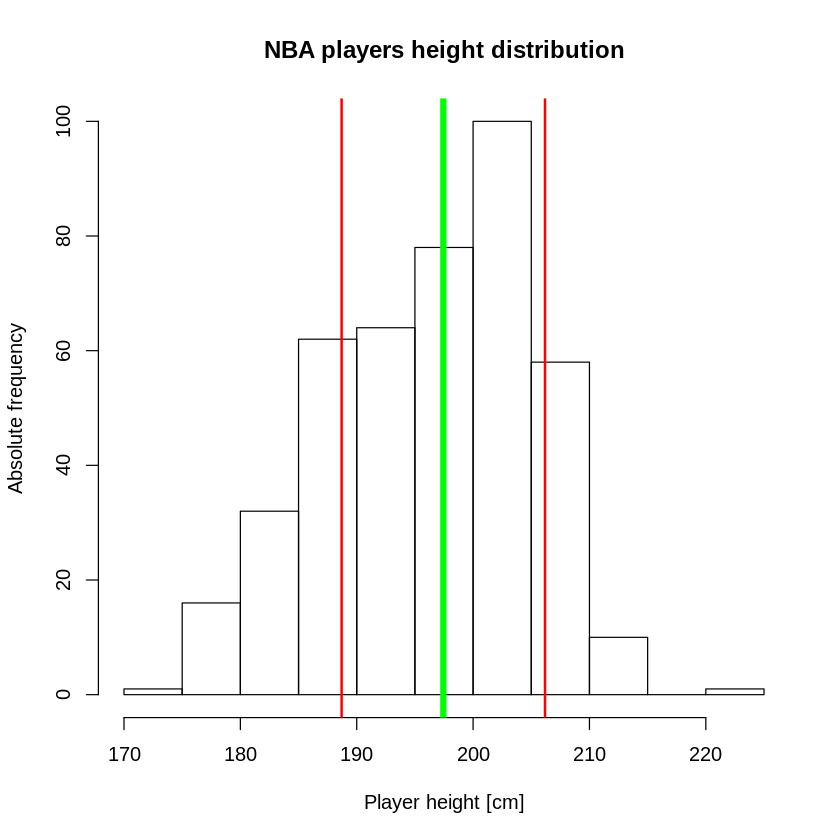

In [11]:
# Plot a histogram representing the players height distribution
hist(my.player.file$Height,
     xlab = "Player height [cm]", ylab = "Absolute frequency",
     main = "NBA players height distribution")

# Adding a green vertical line corresponding to the mean height
abline(v = mean.height, lw = 5, col = "green")

# Adding two red vertical lines corresponding to the mean height +- standard deviation
abline(v = mean.height + std.dev, lw = 2, col = "red")
abline(v = mean.height - std.dev, lw = 2, col = "red")

In [12]:
# Just for curiosity: 

# Total number of players
total.number.players <- nrow(my.player.file)
print(paste("Total number of players:",total.number.players))

# Number of 'short' players
less.180 <- nrow(filter(my.player.file, Height < 180))
print(paste("Number of players shorter than 180 cm:", less.180,"(",
            format(round(100*less.180/total.number.players, 2), nsmall = 2),"%)"))

less.175 <- nrow(filter(my.player.file, Height < 175))
print(paste("Number of players shorter than 175 cm:", less.175,"(",
            format(round(100*less.175/total.number.players, 2), nsmall = 2),"%)"))

# Number of 'tall' players
more.210 <- nrow(filter(my.player.file, Height > 210))
print(paste("Number of players taller than 210 cm:", more.210,"(",
            format(round(100*more.210/total.number.players, 2), nsmall = 2),"%)"))

more.220 <- nrow(filter(my.player.file, Height > 220))
print(paste("Number of players taller than 220 cm:", more.220,"(",
            format(round(100*more.220/total.number.players, 2), nsmall = 2),"%)"))

[1] "Total number of players: 490"
[1] "Number of players shorter than 180 cm: 6 ( 1,22 %)"
[1] "Number of players shorter than 175 cm: 1 ( 0,20 %)"
[1] "Number of players taller than 210 cm: 11 ( 2,24 %)"
[1] "Number of players taller than 220 cm: 1 ( 0,20 %)"


As expected, NBA players are a subset of the population in general taller than the average.
The mean height of the players considered is 197 cm, with a standard deviation of 9 cm.
Additionally, it can be seen in the histogram that the distribution is not centered at the mean values, but _prefers_ values larger than the mean, underlying the importance of being tall to play basketball at high levels.
In this sense, it is interesting to note that there are more player taller than 210 cm (11) than players shorter than 180 cm (6).

Exercise 1.2
=========

In [13]:
#Load the dataset

ice.daily <- read.csv("N_seaice_extent_daily_v3.0.csv")

In [14]:
# Check in which month it is more frequent to have the minimum and maximum extent

# A vector of 'labels' for the months
month.vec  <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

# Extract the vector with the month with the minimum extent each year
minimum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == min(x$Extent)])
}), use.names = FALSE)

# Extract the vector with the month with the maximum extent each year
maximum.months <- unlist(lapply(split(ice.daily, ice.daily$Year), function(x){
    return(x$Month[x$Extent == max(x$Extent)])
}), use.names = FALSE)

# Initializing the vector of frequency for each month
min.month.freq <- numeric(length = 12)
max.month.freq <- numeric(length = 12)

# Transform the vector with the months of minimum extent into a factor
min.month.factor <- (factor(minimum.months))
max.month.factor <- (factor(maximum.months))

# Extract the levels as numbers (by default they come as characters)
min.month.levels <- as.numeric(levels(min.month.factor))
max.month.levels <- as.numeric(levels(max.month.factor))

# Extract the frequencies of the factors
min.month.table <- table(min.month.factor)
max.month.table <- table(max.month.factor)

# Put the correct frequency in the month.freq vector: 
# I read the month.levels vector = c(10,9) and I put the corresponding frequency in month.table in
# the correct entry of month.freq
for (x in min.month.levels){
    ind <- which(min.month.levels == x)
    min.month.freq[x] <- min.month.table[[ind]]
}

for (x in max.month.levels){
    ind <- which(max.month.levels == x)
    max.month.freq[x] <- max.month.table[[ind]]
}

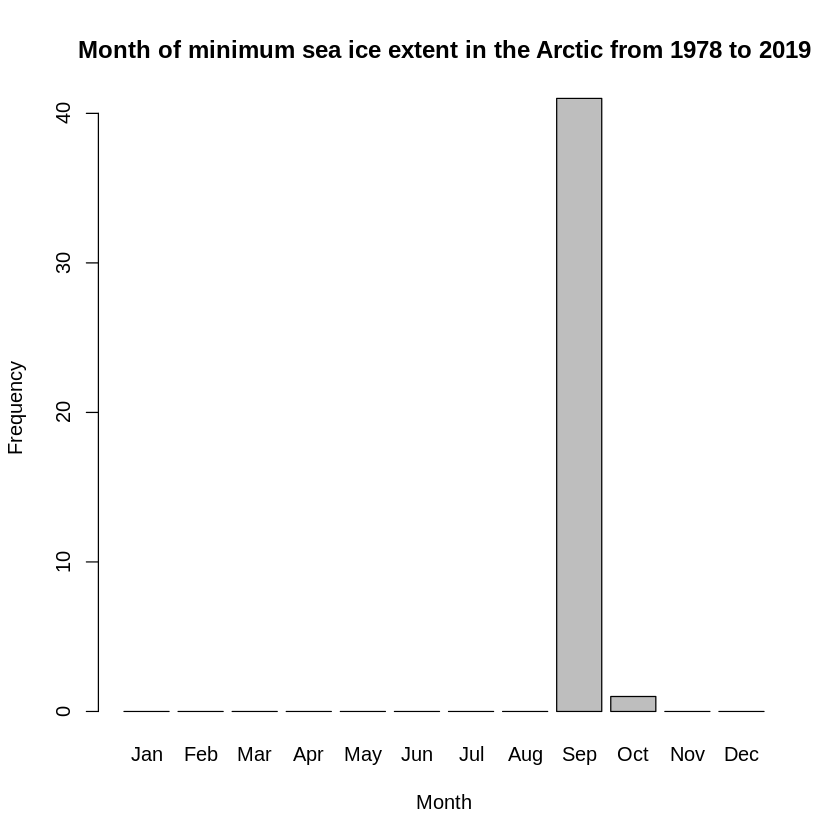

In [15]:
# Barplot for the minimum extent months frequency
barplot(min.month.freq, names.arg = month.vec, xlab = "Month", ylab = "Frequency",
       main = "Month of minimum sea ice extent in the Arctic from 1978 to 2019")

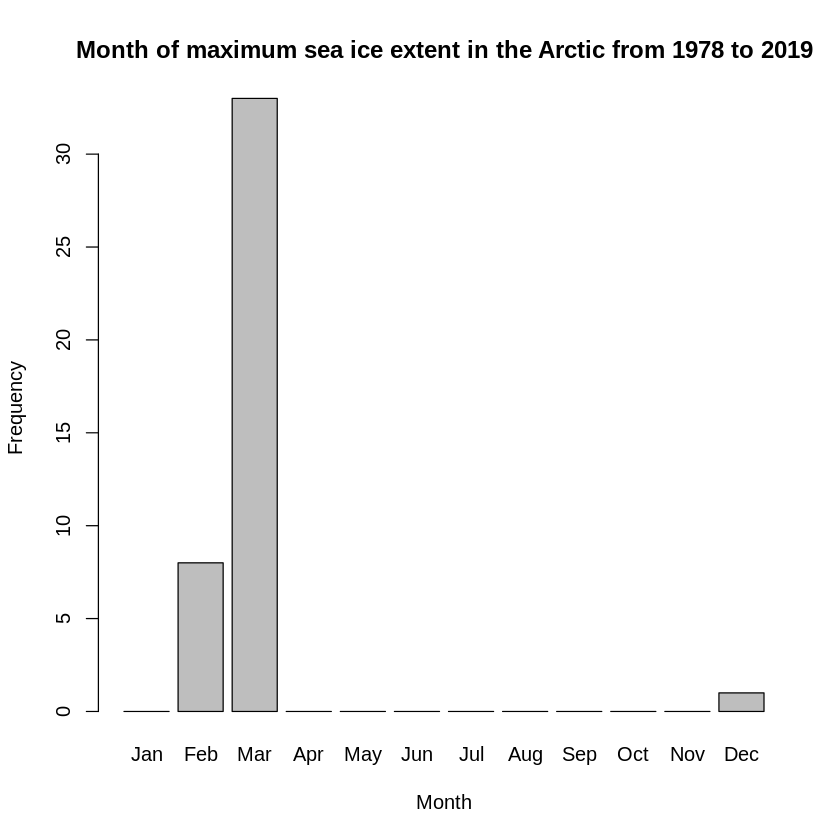

In [16]:
# Barplot for the maximum extent months frequency
barplot(max.month.freq, names.arg=month.vec, xlab = "Month", ylab = "Frequency",
       main = "Month of maximum sea ice extent in the Arctic from 1978 to 2019")

In [17]:
# Plot, month by month, the median value of the extent

# Library to easily manage data.frames
library(tidyverse)

# Defining function to extract an arbitrary quantile of the variable Extent
# from a data frame structured as 'ice.daily'
sea.ice.quantile <- function(data, quant){
    return(quantile(data$Extent, quant))
}

# Supporting vectors for paintings
month     <- 1:12
month.vec <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

# Median, 95% quantile, and 5% quantile for sea-ice extent
medians      <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)
medians.up   <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.95), 
                     use.names = FALSE)
medians.down <- unlist(lapply(split(ice.daily, ice.daily$Month), sea.ice.quantile, quant = 0.05), 
                     use.names = FALSE)

# Create a table with (median, month) to ease plotting
my.table <- as.data.frame(cbind(month,medians))

# Median monthly sea-ice extent in 2012 and 2018
year.2012 <- filter(ice.daily, Year == 2012)
medians.2012 <- unlist(lapply(split(year.2012, year.2012$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)

year.2018 <- filter(ice.daily, Year == 2018)
medians.2018 <- unlist(lapply(split(year.2018, year.2018$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)

# ... and 1980?
year.1980 <- filter(ice.daily, Year == 1980)
medians.1980 <- unlist(lapply(split(year.1980, year.1980$Month), sea.ice.quantile, quant = 0.50), 
                     use.names = FALSE)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ ggplot2 3.2.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


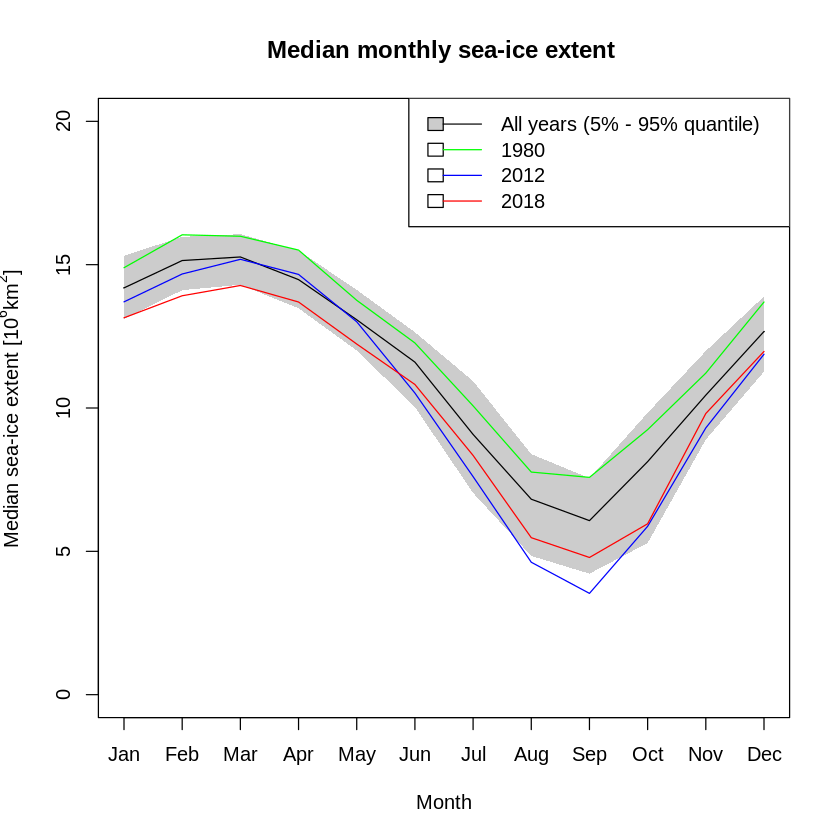

In [18]:
# Finally, the plot
plot(month, medians, xaxt = "n", ylim = c(0,20), type = "l",
    xlab = "Month", ylab = expression(paste("Median sea-ice extent [",10^6,"k",m^2,"]")),
    main = "Median monthly sea-ice extent ")
axis(side = 1, at = month, labels = month.vec)

polygon(c(month, rev(month)), c(medians.up, rev(medians.down)), col = "grey80", border = NA)

lines(month, medians, xaxt = "n", ylim=c(0,20))
lines(month, medians.1980, xaxt = "n", col="green")
lines(month, medians.2012, xaxt = "n", col="blue")
lines(month, medians.2018, xaxt = "n", col="red")

legend("topright",lty=1,c("All years (5% - 95% quantile)", "1980", "2012", "2018"), 
       col = c("black", "green", "blue", "red"),
      fill = c("grey80", NA, NA, NA))

As one can expect, the largest artic sea-ice extent is usually measured at the end of the winter (February or March), while the smallest one at the end of the summer (September or October).
This reflects also to the monthly median values of the sea-ice extent, which oscillate during the year, with a maximum typically in February-March and a minimum typically in September.
Taking the median values for two years in particular (2012 and 2018), one can see the effect of the global warming: in both cases, the extent is equal or smaller than the mean value, with 2018 showing a trend closer to the 5% lower quantile than to the mean value.
It is impressive, on the other hand, how the plot of 1980 almost overlap with the 95% higher quantile.

## Exercise 2.1

Consider an exam with 10 questions with 5 possible answers for each question, to which one has to randomly answer.

Consider the random variable X = number of questions one guesses in the exam.

In [19]:
# The problem can be represented by a binomial distribution
# with the following parameters

# Number of repetitions of the binary experiment
questions  <- 10

# Success probability
probability <- 0.2

In [20]:
# Let's calculate the expected value
# For a binomial distribution: 
# exp = n_repetitions * success_probability

expected <- questions * probability
print(paste("The expected value is:", expected))

# Now calculate the standard deviation
# For a binomial distribution: 
# var = (n_repetitions * success_probability)(1 - success_probability) =
# = exp * (1 - success_probability)
# std.dev = sqrt(var)

std.dev <- sqrt(expected*(1 - probability))

print(paste("The standard deviation is:", format(round(sqrt(std.dev), 2), nsmall = 2)))

[1] "The expected value is: 2"
[1] "The standard deviation is: 1,12"


In [21]:
# Calculate the probability of guessing 0,1,2,..,10 questions

# To do it, we need to evaluate the probability density function (p.d.f.)
# so dbinom ('d' as density) is the R command we need
prob.vec <- dbinom(0:10,questions,probability)

print("The probability to guess:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"question:",format(round(prob.vec[i+1], 8), nsmall = 8)))
    else
        print(paste(i,"questions:",format(round(prob.vec[i+1], 8), nsmall = 8)))
}

print(paste("Luckily, the sum of all the probabilities is:", sum(prob.vec)))

[1] "The probability to guess:"
[1] "0 questions: 0,10737418"
[1] "1 question: 0,26843546"
[1] "2 questions: 0,30198989"
[1] "3 questions: 0,20132659"
[1] "4 questions: 0,08808038"
[1] "5 questions: 0,02642412"
[1] "6 questions: 0,00550502"
[1] "7 questions: 0,00078643"
[1] "8 questions: 7,373e-05"
[1] "9 questions: 4,1e-06"
[1] "10 questions: 1e-07"
[1] "Luckily, the sum of all the probabilities is: 1"


In [22]:
# Calculate the probability of guessing at least i questions

# In this case, we have to evaluate the cumulative probability function, and 
# pbinom is the R command we need
prob.cumulative <- pbinom(0:10, questions, probability)

print("The probability to guess at least:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"question:",format(round(prob.cumulative[i+1], 8), nsmall = 8)))
    else
        print(paste(i,"questions:",format(round(prob.cumulative[i+1], 8), nsmall = 8)))
}

[1] "The probability to guess at least:"
[1] "0 questions: 0,10737418"
[1] "1 question: 0,37580964"
[1] "2 questions: 0,67779953"
[1] "3 questions: 0,87912612"
[1] "4 questions: 0,96720650"
[1] "5 questions: 0,99363062"
[1] "6 questions: 0,99913564"
[1] "7 questions: 0,99992207"
[1] "8 questions: 0,99999580"
[1] "9 questions: 0,99999990"
[1] "10 questions: 1,00000000"


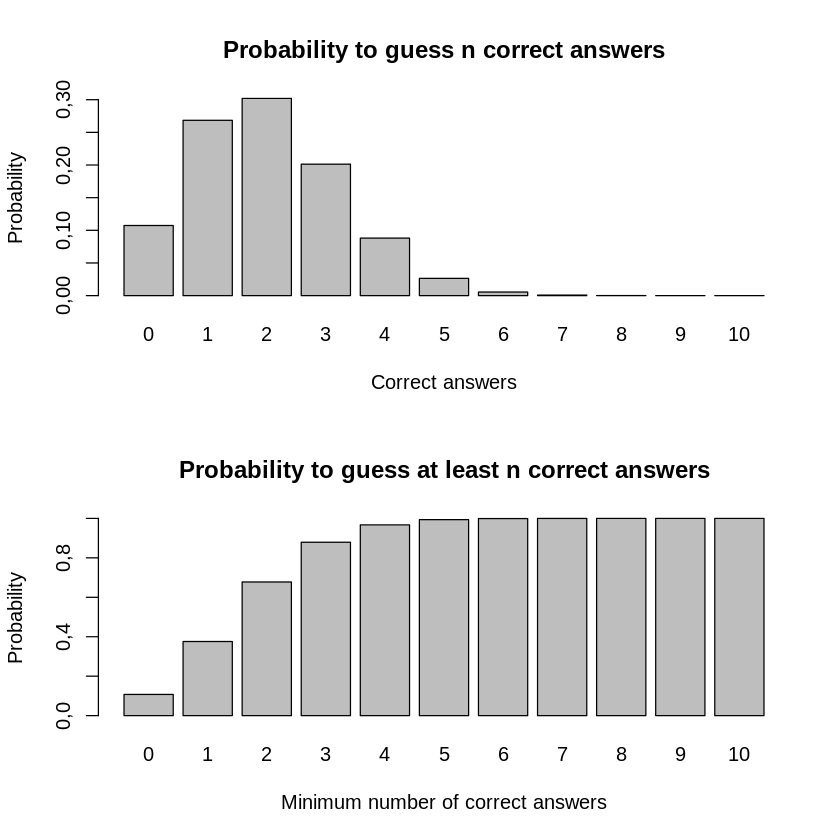

In [25]:
# Create a 2-panel graphics
par(mfrow=c(2,1)) 

# Now, let's plot the probabilities...

barplot(prob.vec, names.arg = c(0:10), xlab = "Correct answers", ylab = "Probability",
       main = "Probability to guess n correct answers")

# ... and the cumulative probabilities
# (probability to guess at least n answers)

barplot(prob.cumulative, names.arg = c(0:10), xlab = "Minimum number of correct answers", ylab = "Probability",
       main = "Probability to guess at least n correct answers")

The most probable number of correct answers is 2, which corresponds to the expected value.

The interpretation is that is not a good idea to answer to this kind of exam randomly.

## Exercise 2.2

Consider the GOT.csv file containing the number of deaths during each of the first 67 episodes of Game of Thrones.


In [27]:
# Load the necessary library and the file

# Useful to manage and plot data.frames
library("tidyverse")

# Load the file
got <- read_csv("GOT.csv")
str(got)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Season = col_double(),
  Episode = col_double(),
  NumDeaths = col_double()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	67 obs. of  4 variables:
 $ X1       : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Season   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Episode  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ NumDeaths: num  4 3 0 1 5 4 2 7 2 3 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   Season = col_double(),
  ..   Episode = col_double(),
  ..   NumDeaths = col_double()
  .. )


The number of deaths in an episode can be considered as a random variable describing the probability of an event to happen in a specific time interval.

If we assume that the distribution of the variable is not affected by the time elapsed since the last event, then we can describe it through a Poisson distribution.

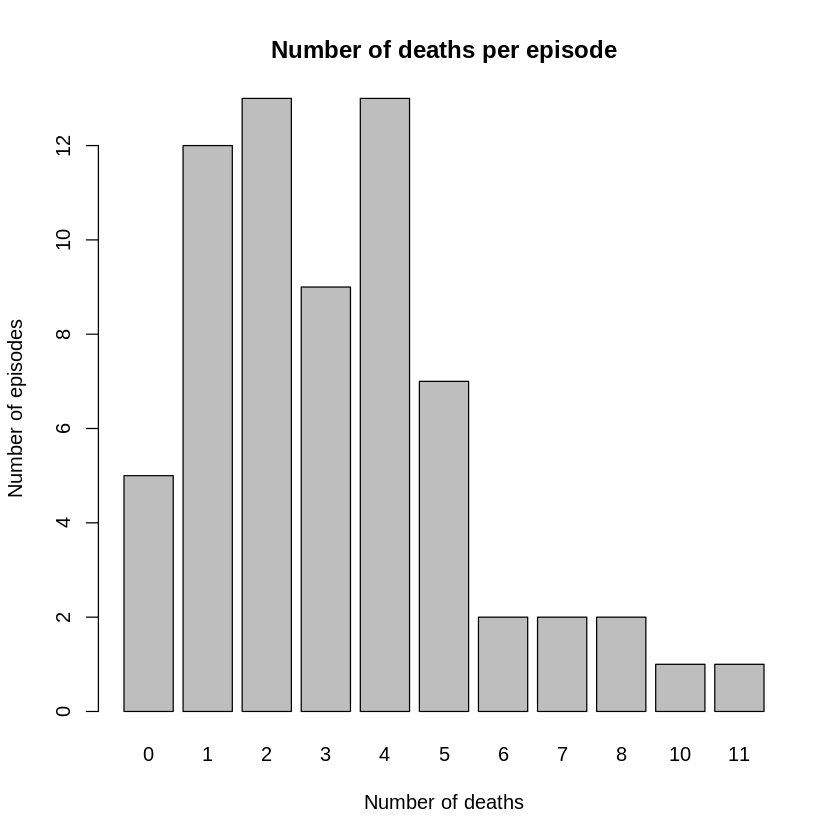

In [28]:
# Let's see how the number of deaths per episode is distributed
death.table <- table(got$NumDeaths)

barplot(death.table, xlab="Number of deaths", ylab="Number of episodes",
       main = "Number of deaths per episode")

In [29]:
# The distribution, as we guessed, is very similar to a Poisson
# Let's extract the key value of the distribution

# lambda = mean value of the distribution
# sqrt(lambda) = standard deviation of the distribution
lambda <- mean(got$NumDeaths)
print(paste("The expected value of deaths in an episode is", format(round(lambda, 2), nsmall = 2)))
print(paste("The standard deviation is", format(round(sqrt(lambda), 2), nsmall = 2)))

[1] "The expected value of deaths in an episode is 3,21"
[1] "The standard deviation is 1,79"


To calculate the probaility to have more than 4 deaths, we do:
(1 - probability to have 4 or less deaths).

In [30]:
# The probability to have more than 4 deaths in an episode can be
# calculated using the 'ppois' function.
# Since 'ppois' returns the probability to have 4 or less deaths,
# we have to consider (1 - ppois(4, lambda))

p.4 <- (1 - ppois(4, lambda))
print(paste("The probability to have more than 4 deaths in an episode is", 
            format(round(p.4*100, 2), nsmall = 2),"%"))

[1] "The probability to have more than 4 deaths in an episode is 22,10 %"


As said, the Poisson distribution describes processes in which the events happen independently on the time elapsed since the former event happened.
This may not be the case in a TV fiction, in which interesting events (as the death of important characters) may cluster at the end of a season, to _hang_ the public until the beginning of the next season.
Let's try to qualitatively test this hypotesis.

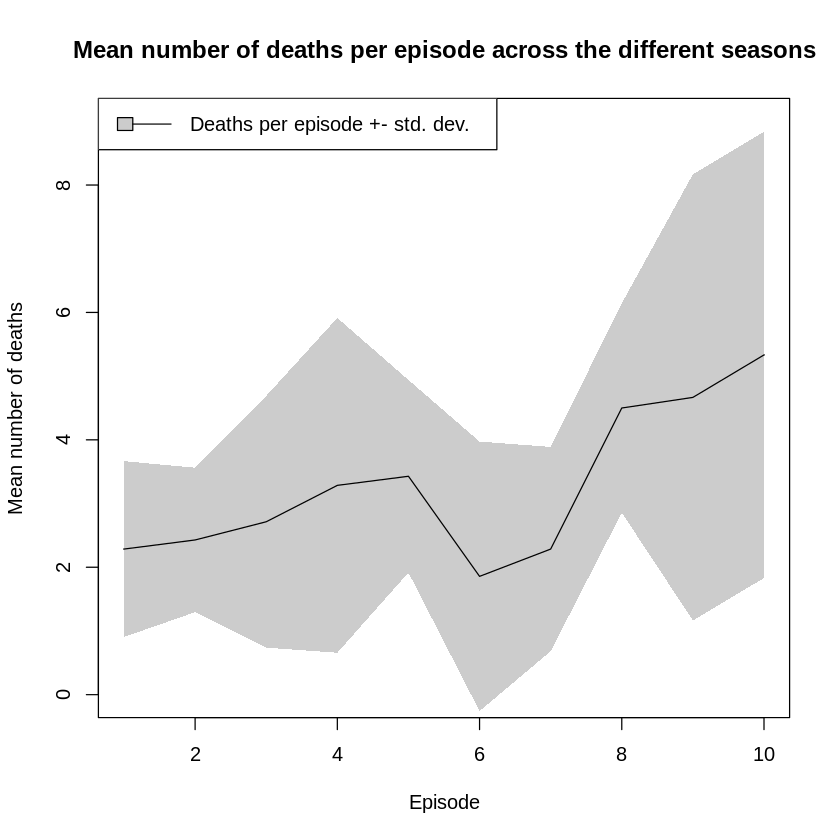

In [31]:
# Let's plot the distribution of the mean number of deaths per episode
# versus the number of episode in the season
death.episode.mean    <- c(tapply(X = got$NumDeaths, INDEX = got$Episode, mean))
death.episode.std.dev <- c(tapply(X = got$NumDeaths, INDEX = got$Episode, sd))

death.episode.std.dev.up   <- death.episode.mean + death.episode.std.dev
death.episode.std.dev.down <- death.episode.mean - death.episode.std.dev

plot(c(1:10), death.episode.mean, ylim = c(0,9), type = "l",
    xlab = "Episode", ylab = "Mean number of deaths",
    main = "Mean number of deaths per episode across the different seasons")

polygon(c(c(1:10), c(10:1)), c(death.episode.std.dev.up, rev(death.episode.std.dev.down)), col = "grey80", border = NA)
lines(c(1:10), death.episode.mean, ylim = c(0,9))

legend("topleft",lty=1, 
       "Deaths per episode +- std. dev.", 
       col = "black",
       fill = "grey80")

It is evident in the previous bar plot that the last episodes of a season count more deaths than the first ones.

In particular, this fact makes the distribution not flat (as it should in a real Poisson). 

As it can be seen, there is a trend that makes the number of deaths to increase when approaching the end of a season. In any case, the large error bars seem allow the assumption that the distribution is not incompatible with a flat probability. 

In other words, our approximation (a Poisson distribution can describe our variable) is a good starting point to try and estimate the probability for a certain number of deaths to happen in an episode.

In [32]:
# To estimate the probability to have exactly n deaths
# in an espisode, we have to evaluate the probability density function,
# by using 'dpois'
death.prob <- dpois(0:10, lambda)

print("The probability to have:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"death:",format(round(death.prob[i+1], 8), nsmall = 8)))
    else
    print(paste(i,"deaths:",format(round(death.prob[i+1], 8), nsmall = 8)))
}

print(paste("In this case, the sum of these probabilities is:",format(round(sum(death.prob), 8), nsmall = 8)))
print(paste("This means that the probability to have more than 10 deaths in an episode is", 
            format(round(1 - sum(death.prob), 8), nsmall = 8)))

[1] "The probability to have:"
[1] "0 deaths: 0,04039880"
[1] "1 death: 0,12963794"
[1] "2 deaths: 0,20800117"
[1] "3 deaths: 0,22248881"
[1] "4 deaths: 0,17848916"
[1] "5 deaths: 0,11455274"
[1] "6 deaths: 0,06126577"
[1] "7 deaths: 0,02808559"
[1] "8 deaths: 0,01126567"
[1] "9 deaths: 0,00401678"
[1] "10 deaths: 0,00128897"
[1] "In this case, the sum of these probabilities is: 0,99949140"
[1] "This means that the probability to have more than 10 deaths in an episode is 0,00050860"


In this case, the sum of the probabilities to observe a number of deaths between 0 and 10 is not 1.
In fact, nothing says that there is a maximum number of deaths per episode: the tail of the Poisson distribution can reach very high values, even if with an almost zero probability.

## Exercise 2.3

Cholesterol level has been measured in a sample of people to have a mean of 180 mg/dL and a standard deviation of 25 mg/dL.

In [33]:
# The distribution describing this measurement is a gaussian (normal)
# with the following parameters:

# Mean of the distribution and expected value
mean <- 180

# Standard deviation
std.dev <- 25

In [34]:
# To get the probability of a person to have more than 225 mg/dL
# we have to calculate the cumulative until 225 mg/dL and 
# take (1 - cumulative(225 mg/dL))

prob.more.225 <- 1 - pnorm(225,180,25)
print(paste("The probability for a person to have more than 225 mg/dL of cholesterol is:",
            format(round(prob.more.225, 4), nsmall = 4)))

[1] "The probability for a person to have more than 225 mg/dL of cholesterol is: 0,0359"


In [35]:
# To get the value of cholesterol that encloses the 95%
# of the population, we have to use the 'qnorm' ('q' as quantile) 
# function

p <- 0.95

perc.95 <- qnorm(p,mean,std.dev)
print(paste("95% of the population has a value of cholesterol of:",
            format(round(perc.95, 0), nsmall = 0),"or less"))

[1] "95% of the population has a value of cholesterol of: 221 or less"


In [36]:
# Considering that the mean value of cholesterol is 180 mg/dL
# and that it cannot assume negative values, it makes sense to 
# plot the probability density function (p.d.f.) and the 
# distribution function between 0 and 360.

# Define x coordinate
x <- seq(0, 360, length=3600)

# Produce a vector with the p.d.f. evaluated
# in each point of x
pdf <- dnorm(x,mean,std.dev)

# Produce a vector with the distribution function evaluated
# in each point of x
dist.func <- pnorm(x,mean,std.dev)

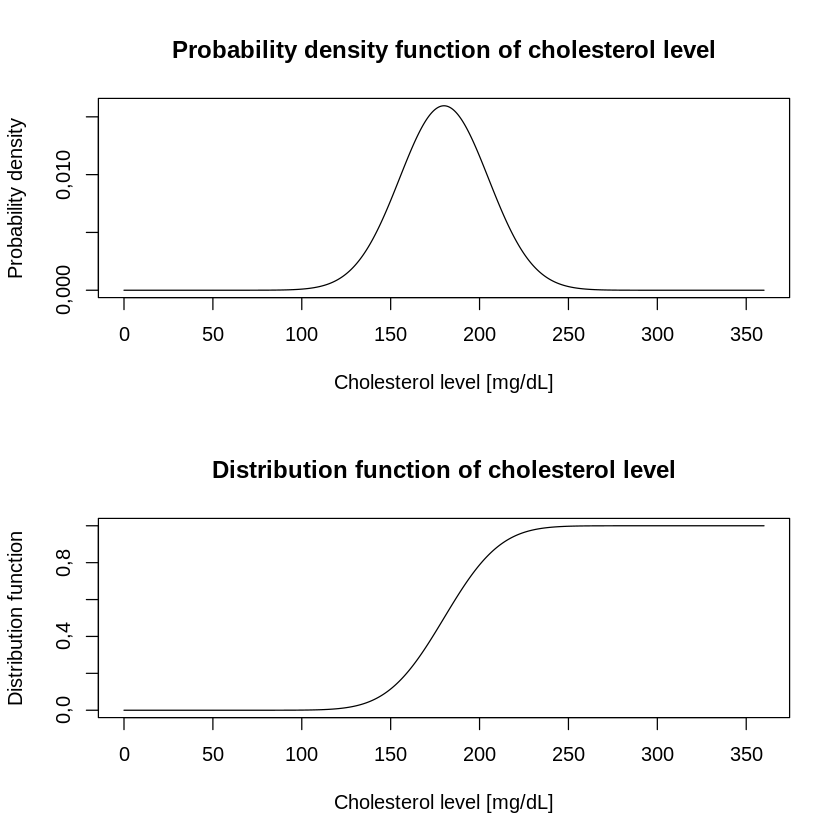

In [39]:
# Now plot the distributions 
par(mfrow=c(2,1)) 

# p.d.f. plot
plot(x, pdf, type="l", lty=1, 
     xlab="Cholesterol level [mg/dL]", ylab="Probability density", 
     main="Probability density function of cholesterol level")

# Distribution function plot
plot(x, dist.func, type="l", lty=1, 
     xlab="Cholesterol level [mg/dL]", ylab="Distribution function", 
     main="Distribution function of cholesterol level")

## Exercise 2.4

In the 'results.csv' file, the results of 40838 international football matches are stored.
In the 'home_score' column, the goal scored by local team in each match are listed.
In the 'home_team' column, the local team in each match is shown.

In [40]:
# Load the necessary library and the file

# Useful to manage and plot data.frames
library("tidyverse")

# Load the file
results <- read_csv("results.csv")
str(results)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  home_team = col_character(),
  away_team = col_character(),
  home_score = col_double(),
  away_score = col_double(),
  tournament = col_character(),
  city = col_character(),
  country = col_character(),
  neutral = col_logical()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	40945 obs. of  9 variables:
 $ date      : Date, format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr  "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr  "England" "Scotland" "England" "Scotland" ...
 $ home_score: num  0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num  0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city      : chr  "Glasgow" "London" "Glasgow" "London" ...
 $ country   : chr  "Scotland" "England" "Scotland" "England" ...
 $ neutral   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character(),
  ..   city = col_character(),
  ..   country = col_character(),
  ..   neutral = col_logical()
  .. )


The number of goals scored in a football match is a variable describing an event that can happen in a specific time interval, so that we can expect its distribution to follow the Poisson function.

Let's try to verify it by inspecting the distribution of goals scored by Spain as local team.

In [41]:
# Select only the matches in which Spain plays at home
spain.local.goals <- filter(results, home_team == "Spain")
str(spain.local.goals)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	357 obs. of  9 variables:
 $ date      : Date, format: "1921-12-18" "1923-01-28" ...
 $ home_team : chr  "Spain" "Spain" "Spain" "Spain" ...
 $ away_team : chr  "Portugal" "France" "Portugal" "Austria" ...
 $ home_score: num  3 3 3 2 1 4 1 1 5 8 ...
 $ away_score: num  1 0 0 1 0 2 0 1 0 1 ...
 $ tournament: chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city      : chr  "Madrid" "San Sebastián" "Seville" "Barcelona" ...
 $ country   : chr  "Spain" "Spain" "Spain" "Spain" ...
 $ neutral   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character(),
  ..   city = col_character(),
  ..   country = col_character(),
  ..   neutral = col_logical()
  .. )


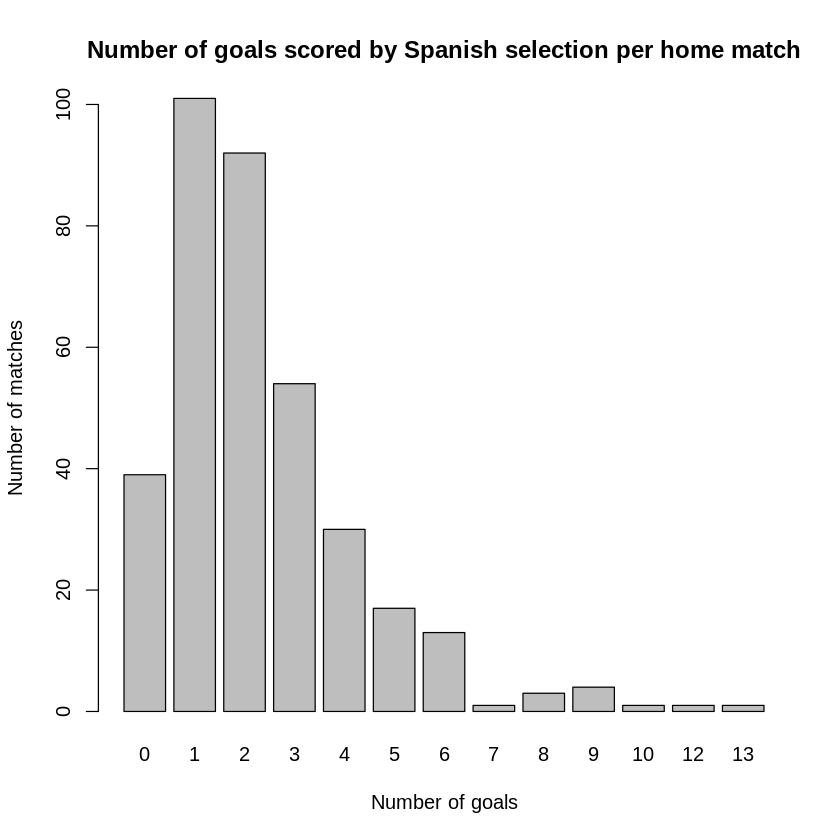

In [42]:
# Create a table of frequencies for the goals scored
goal.table <- table(spain.local.goals$home_score)

# Represent the distribution
barplot(goal.table, xlab = "Number of goals", ylab = "Number of matches",
       main = "Number of goals scored by Spanish selection per home match")

The plots really looks like the one produced by a Poisson distribution.

In [43]:
# Let's extract the key value 'lambda' of the distribution (its mean)

lambda <- mean(spain.local.goals$home_score)

# To estimate the probability to score more than 3 goals
# in the next match, we can calculate the probability
# of scoring 3 or less goals and take the complementary

prob.more.3 <- (1 - ppois(3,lambda))

print(paste("The probability to score more than 3 goals in the next match is", format(round(prob.more.3, 2), nsmall = 2)))

[1] "The probability to score more than 3 goals in the next match is 0,21"


Of course, this estimation relies on the fact that the probability to score a certain amount of goals in a match is the same in every match and does not take into account the fact the not all the teams are at the same level, so it is easier to score more goals against a weaker team than against a stronger team.

As in exercise 2, the probability to score exactly **n** goals is obtained by evaluating the probability density function by using the _dpois_ command.

In [44]:
prob.goal <- dpois(0:10, lambda)

print("The probability to score:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"goal:",format(round(prob.goal[i+1], 8), nsmall = 8)))
    else
    print(paste(i,"goals:",format(round(prob.goal[i+1], 8), nsmall = 8)))
}

print(paste("In this case, the sum of these probabilities is:",format(round(sum(prob.goal), 8), nsmall = 8)))
print(paste("This means that the probability to score more than 10 goals in a match is", 
            format(round(1 - sum(prob.goal), 8), nsmall = 8)))
print(paste("The most probable number of goals scored is 2"))

[1] "The probability to score:"
[1] "0 goals: 0,09724398"
[1] "1 goal: 0,22663023"
[1] "2 goals: 0,26408452"
[1] "3 goals: 0,20515249"
[1] "4 goals: 0,11952862"
[1] "5 goals: 0,05571306"
[1] "6 goals: 0,02164018"
[1] "7 goals: 0,00720473"
[1] "8 goals: 0,00209886"
[1] "9 goals: 0,00054350"
[1] "10 goals: 0,00012666"
[1] "In this case, the sum of these probabilities is: 0,99996683"
[1] "This means that the probability to score more than 10 goals in a match is 3,317e-05"
[1] "The most probable number of goals scored is 2"


A bookmaker pays 4 Euros for every Euro you bet (you gain 3 Euros) if Spain scores more than 3 goals in the next home match, otherwise you loose the Euro you bet. 

Is it a good idea to bet?

To decide this, we have to evaluate the expected amount of money we gain if we bet.

In [45]:
# Probability to win
p.win <- prob.more.3

# What we win
money.win <- 3


# Probability to lose
p.lose <- 1 - p.win

# What we loose
money.lose <- 1


# Expected amount of money gained
money <- (p.win * money.win) - (p.lose * money.lose)

# Result:

word <- 0
phrase <-0

if(money > 0){
    word <- "win"
    phrase <- "Let's bet!"    
} else{
    word <- "lose"
    phrase <- "I would not bet."
}
    
print(paste("The expectation is that for every euro we play, we",word,format(round(abs(money), 2), nsmall = 2),"euros"))
print(phrase)

[1] "The expectation is that for every euro we play, we lose 0,17 euros"
[1] "I would not bet."


# Exercise 3.1

In [46]:
# The mean waiting time is (a + b)/2, where:

# The train arrives now (no wait)
a <- 0

# Maximum expected waiting time
b <- 100

mean.time <- (a + b)/2

# The standard deviation, on the other hand, 
# is given by: (b - a)/sqrt(12)

var.time <- (b - a)*(b - a)/12

print(paste("The mean waiting time is:", format(round(mean.time, 2), nsmall = 2),"minutes"))
print(paste("The variance is:", format(round(var.time, 2), nsmall = 2),"minutes^2"))
print(paste("The standard deviation is:", format(round(sqrt(var.time), 2), nsmall = 2),"minutes"))

[1] "The mean waiting time is: 50,00 minutes"
[1] "The variance is: 833,33 minutes^2"
[1] "The standard deviation is: 28,87 minutes"


In [47]:
# Simulate the waiting time of 30 people

# Fi the seed just to have every time the same result
set.seed(1)

# Simulate the 30 waiting times, using a uniform distribution
wait.time <- runif(30,0,100)

sample.mean.time = mean(wait.time)
print(paste("The mean waiting time for this sample is:", format(round(sample.mean.time, 2), nsmall = 2)))

sample.var.time <- var(wait.time)
print(paste("The variance for this sample is:", format(round(sample.var.time, 2), nsmall = 2)))

print(paste("The standard deviation for this sample is:", format(round(sqrt(sample.var.time), 2), nsmall = 2)))

[1] "The mean waiting time for this sample is: 50,96"
[1] "The variance for this sample is: 871,90"
[1] "The standard deviation for this sample is: 29,53"


The mean value of the sample is the same as the expected mean value. 
In our case, 50 minutes

The variance of the sample is related to the expected variance through the relation:

$var(X) = \frac{var(\bar{X})}{n}$

where n is the size of the sample

In [48]:
# Case n = 30
n <- 30
var.sample.30 <- var.time / n
print(paste("The variance for a sample of",n,"people is:", format(round(var.sample.30, 2), nsmall = 2)))

# Case n = 100
n <- 100
var.sample.100 <- var.time / n
print(paste("The variance for a sample of",n,"people is:", format(round(var.sample.100, 2), nsmall = 2)))

[1] "The variance for a sample of 30 people is: 27,78"
[1] "The variance for a sample of 100 people is: 8,33"


In [49]:
# Simulate 500 random samples of 30 people.

# A huge (30 x 500) matrix
mat.30 <- matrix(runif(30*500,0,100), ncol = 500)

# A vector storing the means of the 500 random samples
mean.vec.30 <- colMeans(mat.30)

# The mean of the 500 mean values
my.mean.30 <- mean(mean.vec.30)

# The variance of the 500 mean values
my.var.30 <- var(mean.vec.30)

print(paste("The mean extracted from 500 samples of 30 people is:", format(round(my.mean.30, 2), nsmall = 2)))
print(paste("The variance extracted from 500 samples of 30 people is:", format(round(my.var.30, 2), nsmall = 2)))

[1] "The mean extracted from 500 samples of 30 people is: 49,98"
[1] "The variance extracted from 500 samples of 30 people is: 31,58"


The mean value is, as we expected, ~50 in every case, since the mean value is always distributed around the expected value.

By simulating 500 samples of 30 people waiting for the train, we get a value of the variance very close to the one we expected for a sample of 30 people.

In [50]:
# Now do the same, but for samples of 100 people.

# Simulate 500 random samples of 100 people.

# A huge (100 x 500) matrix
mat.100 <- matrix(runif(100*500,0,100), ncol = 500)

# A vector storing the means of the 500 random samples
mean.vec.100 <- colMeans(mat.100)

# The mean of the 500 mean values
my.mean.100 <- mean(mean.vec.100)

# The variance of the 500 mean values
my.var.100 <- var(mean.vec.100)

print(paste("The mean extracted from 500 samples of 30 people is:", format(round(my.mean.100, 2), nsmall = 2)))
print(paste("The variance extracted from 500 samples of 30 people is:", format(round(my.var.100, 2), nsmall = 2)))

[1] "The mean extracted from 500 samples of 30 people is: 50,10"
[1] "The variance extracted from 500 samples of 30 people is: 7,77"


Also in this case, by simulating 500 samples of 100 people waiting for the train, we get a value of the variance very close to the one we expected for a sample of 100 people.

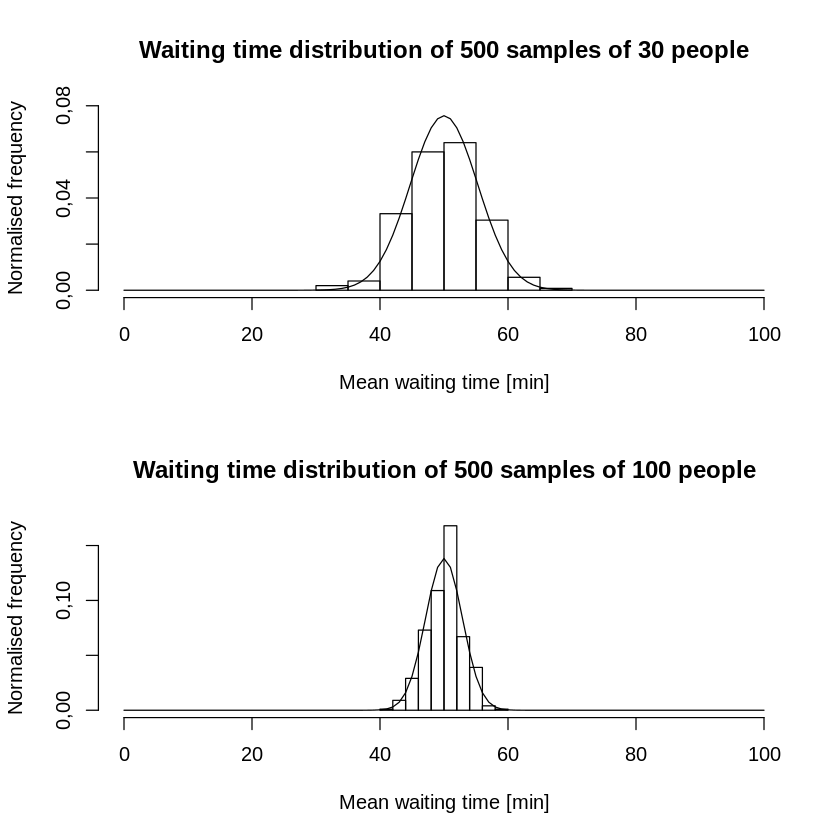

In [51]:
# Plot the 2 previous mean distributions in a 2-panel figure
# and superimpose the corresponding expected normal distribution.

# Prepare the 2-panel figure
par(mfrow=c(2,1)) 

# 30-people sample
hist(mean.vec.30, xlim = c(0,100), ylim = c(0,0.08),
     xlab="Mean waiting time [min]", ylab="Normalised frequency", 
     main="Waiting time distribution of 500 samples of 30 people",
     freq = F)
curve(dnorm(x,50,sqrt(var.sample.30)), from = 0, to = 100, add = TRUE)

# 100-people sample
hist(mean.vec.100, xlim = c(0,100),
     xlab="Mean waiting time [min]", ylab="Normalised frequency", 
     main="Waiting time distribution of 500 samples of 100 people",
     freq = F)

curve(dnorm(x,50,sqrt(var.sample.100)), from = 0, to = 100, add = TRUE)

The plots of the distributions related to the samples we generated agree very well with the expected p.d.f. in both cases.

In other words, the histogram representing the distribution of the 500 mean values of the waiting times for samples of 30 people agrees with a gaussian centered at 50 and with a standard deviation of $\sqrt{27.7}$.
Similarly, the histogram representing the distribution of the 500 mean values of the waiting times for samples of 100 people agrees with a gaussian centered at 50 and with a standard deviation of $\sqrt{8.33}$.

This means that by taking the mean value of n uniform distributions (with n large enough, in our case n = 500), we get a normal distribution with expected value corresponding to the expected value of the uniform distribution and variance equal to $\frac{var(uniform)}{n}$. 

So, we have empirically verified the central limit theorem in the specific case of uniform distributions.


# Exercise 4.1

Simulate the extraction of a card from a spanish deck and check if it is a "basto".

In [52]:
# Number of repetitions
rep <- 100

# We have 40 cards in the deck
deck <- 40

#  1 - 10 --> bastos
# 11 - 20 --> copas
# 21 - 30 --> espadas
# 31 - 40 --> oros

my.cards <- sample(deck, rep, replace = T)

n.bastos <- 0
for(i in sample(deck, rep, replace = T)){
    if (i < 11)
        n.bastos <- n.bastos + 1
}

print(paste("Out of",rep,"cards extracted,",n.bastos,"are bastos"))

[1] "Out of 100 cards extracted, 21 are bastos"


# Exercise 4.2

The number of kilometers travelled (X) until a fall in a given cycling race can be modelled as an exponantial:

$f(x) = \lambda e^{-\lambda x}$

where $\lambda$ = 0.01 is the average number of falls per kilometer.

f(x) is our p.d.f.
If we want to simulate 1000 distances until a fall, we can use the inverse transform sampling.

First of all, we need the distribution function associated to the p.d.f., namely its primitive, such that the total area under the curve is 1:

F(x) = $1 - e^{-\lambda x}$

Inverting F(x), we get:

x = -$\frac{\log(1 - F(x))}{\lambda}$

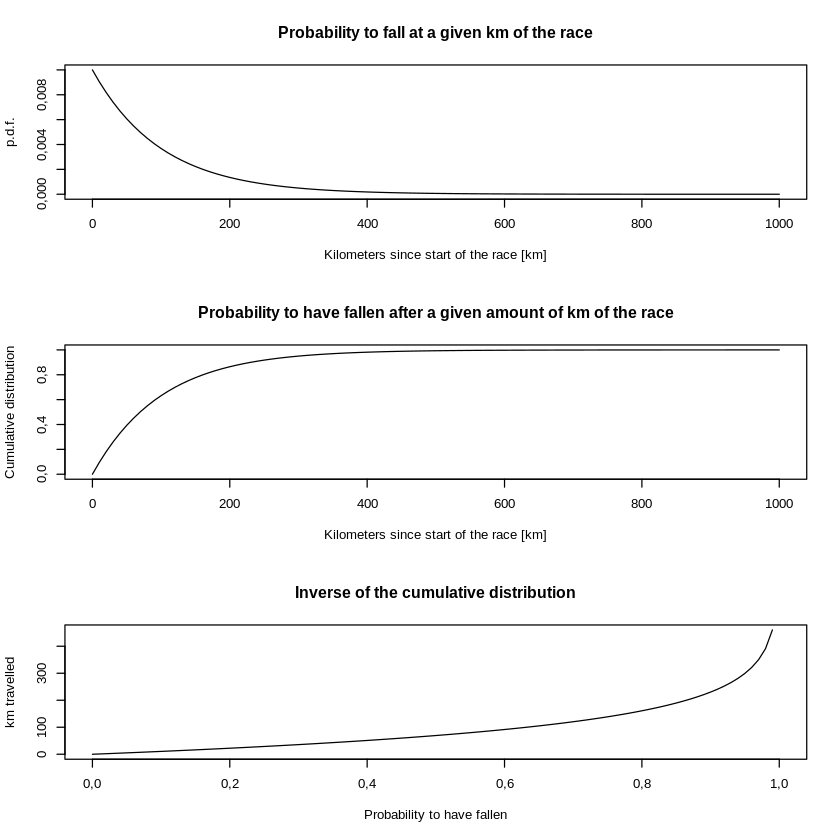

In [53]:
lambda <- 0.01

# Let's try to plot the three functions
par(mfrow=c(3,1)) 

# p.d.f
curve(lambda*exp(-lambda*x),0, 1000,
     xlab = "Kilometers since start of the race [km]",
     ylab = "p.d.f.",
     main = "Probability to fall at a given km of the race")
        

# F(x)
curve(1-exp(-lambda*x),0, 1000,
     xlab = "Kilometers since start of the race [km]",
     ylab = "Cumulative distribution",
     main = "Probability to have fallen after a given amount of km of the race")

# F'(x)
curve(-log(1-x)/lambda,0, 1,
     xlab = "Probability to have fallen",
     ylab = "km travelled",
     main = "Inverse of the cumulative distribution")

The distributions look reasonable. Let's simulate 1000 races, to see when the first fall occurs.

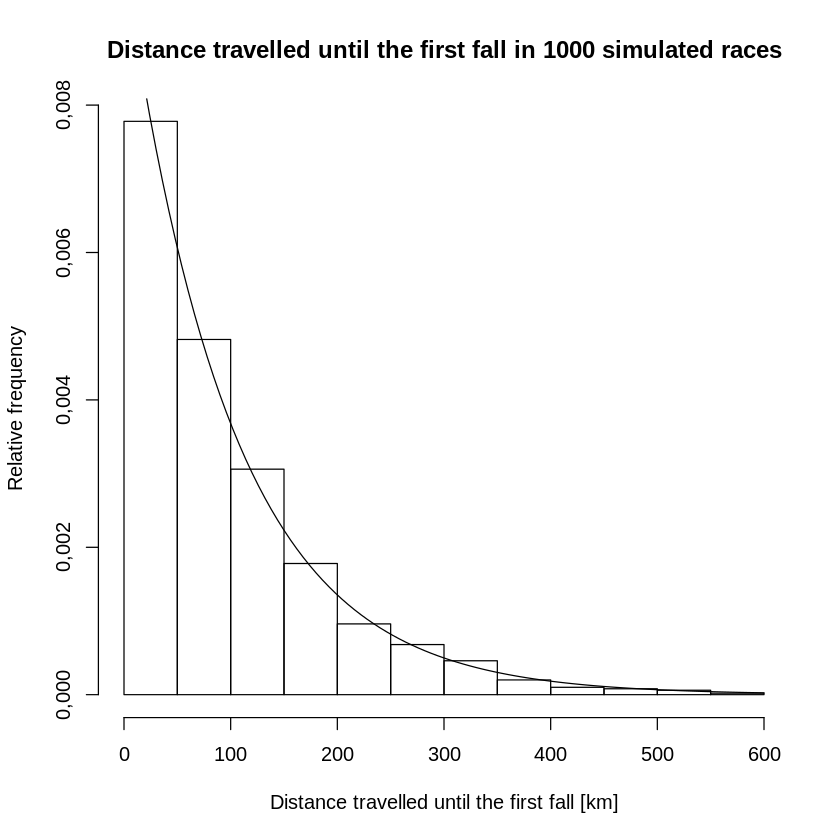

In [54]:
# Define a function in R to make things easier
inverse <- function(x, par){return(-log(1-x)/par)}

# Number of races to simulate
n.races <- 1000

# Actual simulation
distance.vector <- inverse(runif(n.races,0,1),lambda)

# Plot the distribution
hist(distance.vector, freq = F,
    xlab = "Distance travelled until the first fall [km]",
    ylab = "Relative frequency",
    main = "Distance travelled until the first fall in 1000 simulated races")
curve(lambda*exp(-lambda*x), add = T)

# Exercise 4.3

The angular size, in grades (X), of some objects in the sky is a random variable with density function: 

$f(x) = K x^{-3}$

with x > 1, for physical reasons.

Since f(x) is a density function, its integral has to be 1:

$\int_1^\infty K x^{-3}$ = 1

This means that K is given by the following relation:

$\int_1^\infty x^{-3} = \frac{1}{K} = \frac{1}{2}$ 

So that:

$K = 2$

In other words, our p.d.f. is:

$
f(x) = 
    \begin{cases}
     2 x^{-3} & \text{if}\ x > 1 \\
     0 & \text{if}\ x \leq 1 \\
    \end{cases}
$

Thus, the cumulative distribution is:

$
F(x) = 
    \begin{cases}
     1 - \frac{1}{x^2} & \text{if}\ x > 1 \\
     0 & \text{if}\ x \leq 1 \\
    \end{cases}
$

And the inverse of the cumulative:

$
F'(x) = 
    \begin{cases}
     \frac{1}{\sqrt{1 - x}} & \text{if}\ x > 1 \\
     0 & \text{if}\ x \leq 1 \\
    \end{cases}
$


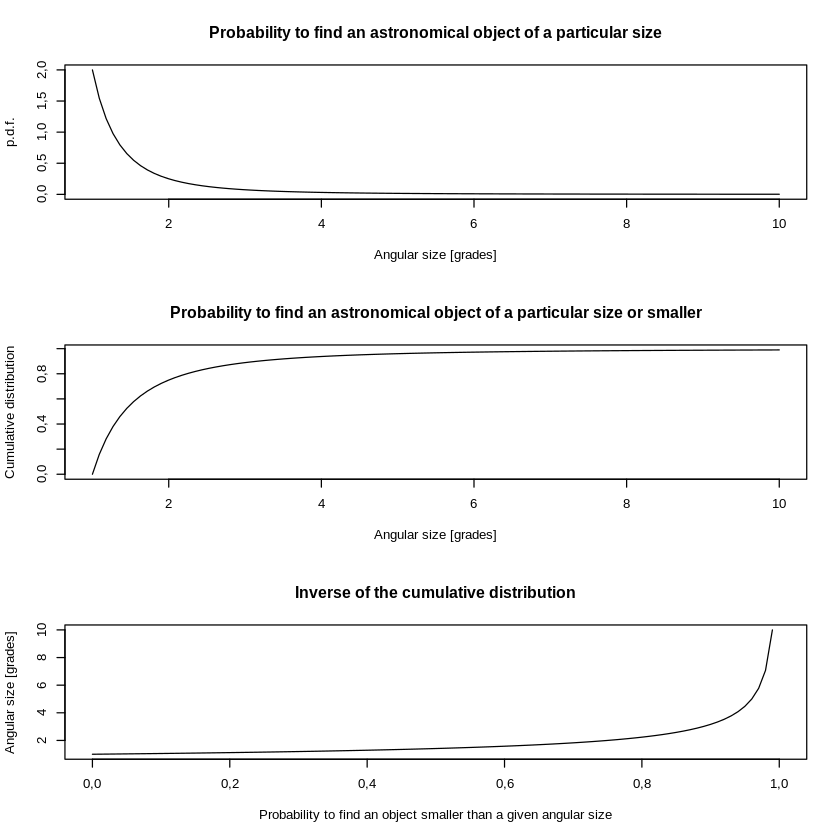

In [55]:
# Let's try to plot the three functions
par(mfrow=c(3,1)) 

# p.d.f
curve(2/(x**3),1, 10,
     xlab = "Angular size [grades]",
     ylab = "p.d.f.",
     main = "Probability to find an astronomical object of a particular size")
        

# F(x)
curve(1 - 1/(x**2),1, 10,
     xlab = "Angular size [grades]",
     ylab = "Cumulative distribution",
     main = "Probability to find an astronomical object of a particular size or smaller")

# F'(x)
curve(1 / sqrt(1 - x),0, 1,
     xlab = "Probability to find an object smaller than a given angular size",
     ylab = "Angular size [grades]",
     main = "Inverse of the cumulative distribution")

Now let's simulate 1000 random numbers under the given distribution.

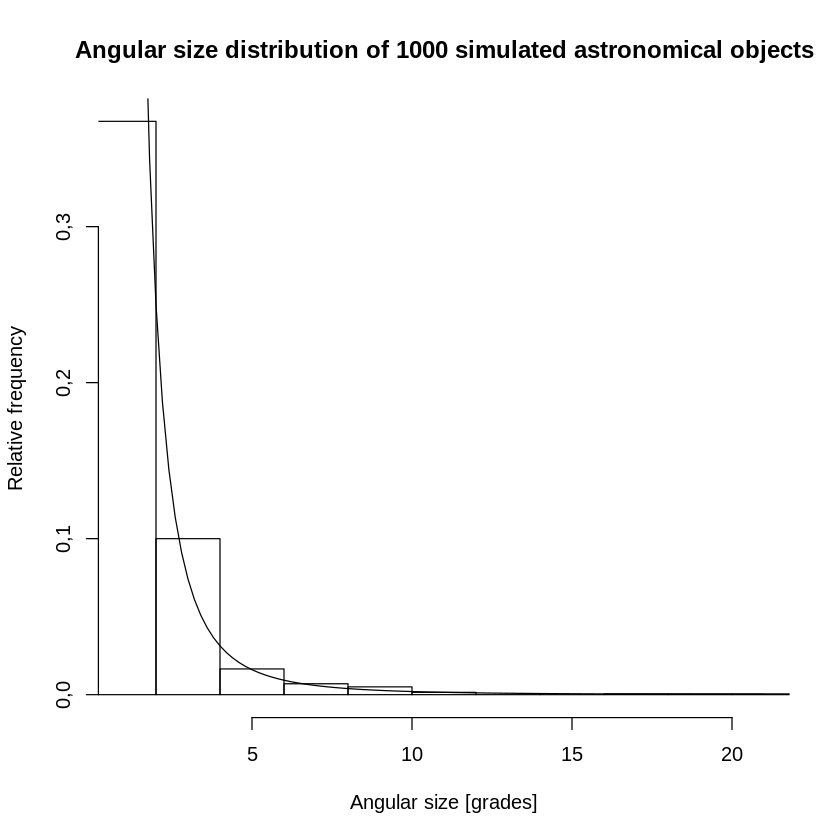

In [56]:
# Define a function in R to make things easier
inverse.two <- function(x){return(1 / sqrt(1 - x))}

# Number of astronomical objects to simulate
n.objects <- 1000

# Actual simulation
objects.vector <- inverse.two(runif(n.objects,0,1))

# Plot the distribution
hist(objects.vector, freq = F, breaks=20, xlim = c(1,21),
    xlab = "Angular size [grades]",
    ylab = "Relative frequency",
    main = "Angular size distribution of 1000 simulated astronomical objects")
curve(2/(x**3), add = T)

## Exercise 5.1

Roll a dice 50 times.

In [57]:
dice <- 1:6
times <- 50

roll.dice <- sample(dice, times, replace = T)

The first two quantities are the sample mean and variance and are computed directly looking at the sample we simulated:
- $\bar{X}$ = sample mean
- $S^2$ = sample variance

In [58]:
sample.mean <- mean(roll.dice)
sample.var  <- var(roll.dice)

print(paste("The mean value of the sample generated is", sample.mean))
print(paste("Its variance is", format(round(sample.var, 2), nsmall = 2)))

[1] "The mean value of the sample generated is 3,42"
[1] "Its variance is 3,39"


All the other quantities are expected, so that they can be predicted without generating any sample. Given that the result of rolling a dice follow a discrete uniform distribution:
- E(X) = expected value = $\frac{1 + 6}{2}$ = 3.5
- Var(X) = variance = $\frac{6^2 - 1}{12}$ = $\frac{35}{12}$
- E($\bar{X}$) = expected sample mean = sample mean = 3.5
- Var($\bar{X}$) = expected sample variance = $\frac{Var(X)}{n}$ = $\frac{35}{12} \times \frac{1}{50}$ = $\frac{7}{120}$


## Exercise 5.2

In [59]:
dice <- 1:6
times <- 50

roll.dice1 <- sample(dice, times, replace = T)
roll.dice2 <- sample(dice, times, replace = T)

sum.dice <- roll.dice1 + roll.dice2

As in the previous case, the first two quantities are the sample mean and variance and are computed directly looking at the sample we simulated. Now the variable to consider is the sum
- $\bar{X}$ = sample mean
- $S^2$ = sample variance

In [60]:
sample.mean.2 <- mean(sum.dice)
sample.var.2  <- var(sum.dice)

print(paste("The mean value of the sample generated is", sample.mean.2))
print(paste("Its variance is", format(round(sample.var.2, 2), nsmall = 2)))

[1] "The mean value of the sample generated is 7,54"
[1] "Its variance is 6,29"


All the other quantities are expected, so that they can be predicted without generating any sample. 

Now we are considering the sum of two independent random variables.
This means that:
- E(X) = E(X1) + E(X2) = 3.5 + 3.5 = 7
- Var(X) = Var(X1) + Var(X2) = $\frac{35}{12}$ + $\frac{35}{12}$ = $\frac{35}{6}$
- E($\bar{X}$) = expected sample mean = sample mean = 7
- Var($\bar{X}$) = expected sample variance = $\frac{Var(X)}{n}$ = $\frac{35}{6} \times \frac{1}{50}$ = $\frac{7}{60}$

## Exercise 5.3

Simulate the height of 50 people with a mean of 176 cm and standard deviation of 11 cm.

In [61]:
n.people <- 50
mean.height <- 176
std.dev.height <- 11

height.vector <- rnorm(n.people, mean.height, std.dev.height)
height.vector

[1] 172,0784 168,1772 188,1008 176,5317 188,1246 160,3448 161,8033 167,3110
 [9] 187,0684 184,4829 203,0126 160,0357 172,8145 168,6923 178,3359 183,9550
[17] 185,2857 175,7711 184,5243 177,8832 180,6497 162,8466 179,2759 174,4517
[25] 160,7957 174,6948 163,9042 173,2822 161,9323 164,5064 186,4047 175,5823
[33] 171,2041 189,4679 171,7351 190,0563 188,9196 170,5117 187,1974 186,4890
[41] 168,1391 175,2950 193,7156 171,2909 176,6947 169,5361 178,8911 183,6751
[49] 187,5828 176,6078

As in the previous cases:
- $\bar{X}$ = sample mean
- $S^2$ = sample variance

In [62]:
sample.mean.height <- mean(height.vector)
sample.var.height  <- var(height.vector)

print(paste("The mean value of the sample generated is", sample.mean.height))
print(paste("Its variance is", format(round(sample.var.height, 2), nsmall = 2)))

[1] "The mean value of the sample generated is 176,793383398526"
[1] "Its variance is 99,23"


- E(X) = mean value = 176 cm
- Var(X) = (std.dev)^2 = 11$^2$ = 121 cm$^2$
- E($\bar{X}$) = expected sample mean = sample mean = 176 cm
- Var($\bar{X}$) = expected sample variance = $\frac{Var(X)}{n}$ = $\frac{121}{50}$ cm$^2$

## Exercise 5.4

Simulate the number of goals scored in 10 matches, given the mean number of goals scored in a match is 2.8.

This is a typical example of a Poisson distribution.

In [63]:
n.matches <- 10
mean.goals <- 2.8

goals.vector <- rpois(n.matches, mean.goals)
goals.vector

[1] 3 5 3 3 4 2 3 0 2 2

For a Poisson distribution:
- $\bar{X}$ = sample mean = $S^2$



In [64]:
lambda.measured <- mean(goals.vector)

print(paste("The mean value of goals scored is", lambda.measured))


[1] "The mean value of goals scored is 2,7"


- E(X) = Var(X) = 2.8
- E($\bar{X}$) = expected sample mean = sample mean = 2.8
- Var($\bar{X}$) = expected sample variance = $\frac{Var(X)}{n}$ = $\frac{2.8}{10}$ = 0.28

## Exercise 5.5

Simulate the position of 32 chips in a 8x8 boxes table, given that only one chip can sit in a box.

To do this, we sample 32 numbers between 1 and 64, without replacing them.

In [65]:
table <- 1:64
chips <- 32

put.chips <- sample(table, chips, replace = F)
put.chips

[1] 38 30 34 40 54 25 20 43 36 64 11 27 16 12 33 18 59 50 41 63 57 10 22 55 62
[26] 48 23 32 51 26  3  9

The numbers obtained are used a indices for a vector of size 64, initially filled with zeros: the positions specified by *put.chips* will be filled with 1. 

Finally, the vector *my.chessboard* is reshaped as a $8 \times 8$ matrix. 

In [66]:
my.chessboard <- c(rep(0,64))
my.chessboard[put.chips] <- 1
my.chessboard <- matrix(my.chessboard,nrow = 8,ncol = 8)
my.chessboard

0,1,0,1,1,1,0,1
0,1,1,1,1,0,1,0
1,1,0,1,0,1,1,1
0,1,1,0,1,0,0,0
0,0,0,0,0,0,0,0
0,0,1,1,1,0,1,1
0,0,1,0,0,0,1,1
0,1,0,1,1,1,0,1


## Exercise 5.5

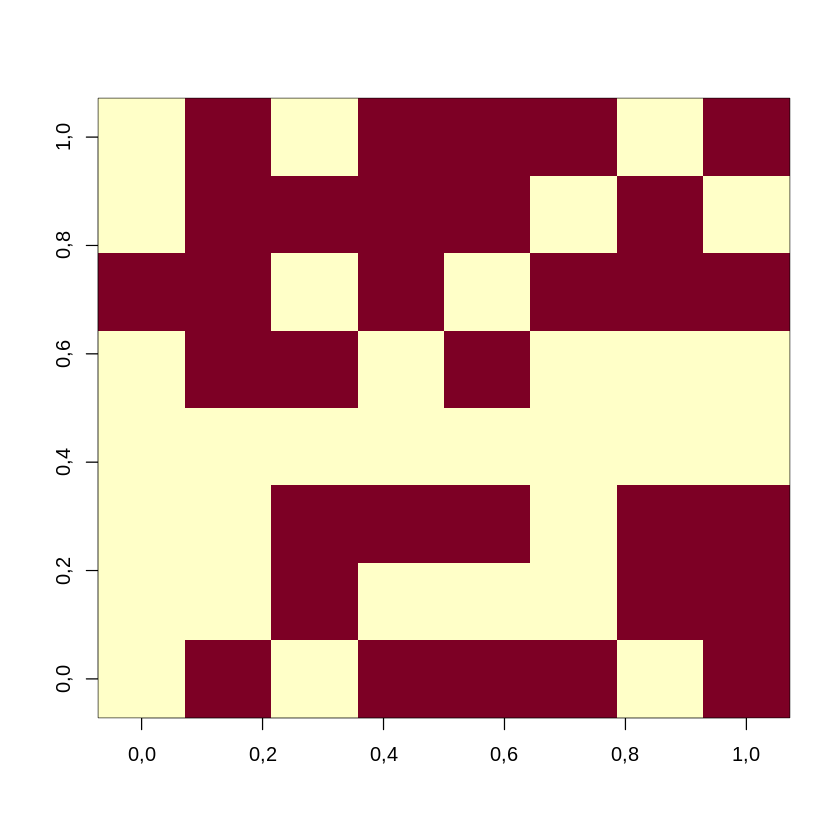

In [67]:
# By default, r prints a matrix transpose and upside down
# This appears to fix it:
image(t(my.chessboard)[,nrow(my.chessboard):1])

## Exercise 6.1

The cold usually takes 6.7 days to heal. A homeopatic team claims its medicine is able to reduce this time.

In [68]:
# Time (in days) to heal a cold when using the homeopatic medicine:

days <- read.csv("days.txt", header=F)[,]
days

[1] 4,2 8,0 9,4 5,7 5,8 3,6 6,4 5,3 8,2 6,5 6,4 5,6 5,1 6,1 5,7 5,5 9,2 5,9 6,2
[20] 8,4

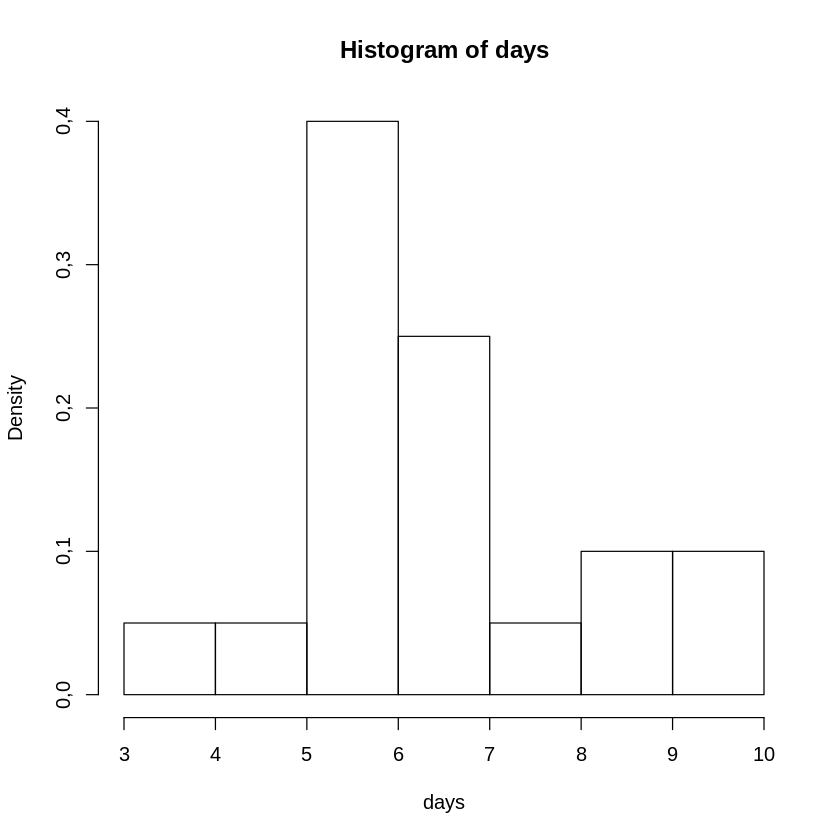

In [69]:
hist(days, freq = F)

Let's define the hipoteses and the choose a value for $\alpha$:
- H$_0$: the time needed to heal the cold is shorter if you take the medicine;
- H$_1$: the time needed to heal the cold is not affected by the medicine;
- $\alpha$ = 0.05

In [70]:
t.test(days, mu=6.7, alternative="less")


	One Sample t-test

data:  days
t = -0,984, df = 19, p-value = 0,1687
alternative hypothesis: true mean is less than 6,7
95 percent confidence interval:
     -Inf 6,957463
sample estimates:
mean of x 
     6,36 


The time needed to heal a cold using the homeopatic medicine is compatible (or better, not incompatible) with the one needed to heal without using any medicine. 

For this reason, we can conclude that the medicine is not useful.

## Exercise 6.2

In [71]:
no.smoking <- read.table("sin_cannabis.txt", header = T)
smoking <- read.table("con_cannabis.txt", header = T)

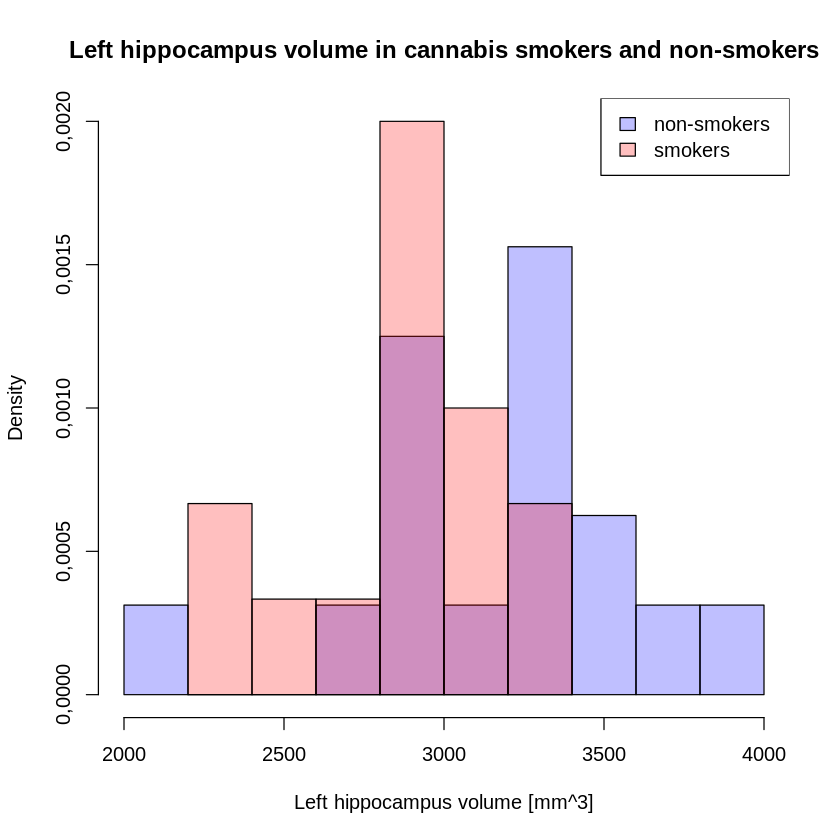

In [72]:
hist(no.smoking$izq, col=rgb(0,0,1,1/4), xlim = c(2000,4000), breaks = 10, freq = F, ylim = c(0,0.002),
    xlab = "Left hippocampus volume [mm^3]",
    main = "Left hippocampus volume in cannabis smokers and non-smokers")
hist(smoking$izq,    col=rgb(1,0,0,1/4), xlim = c(2000,4000), add = T, freq = F)

legend("topright", legend=c("non-smokers", "smokers"),
       col=c(rgb(0,0,1,1/4), rgb(1,0,0,1/4)), fill = c(rgb(0,0,1,1/4), rgb(1,0,0,1/4)), cex=1.0)

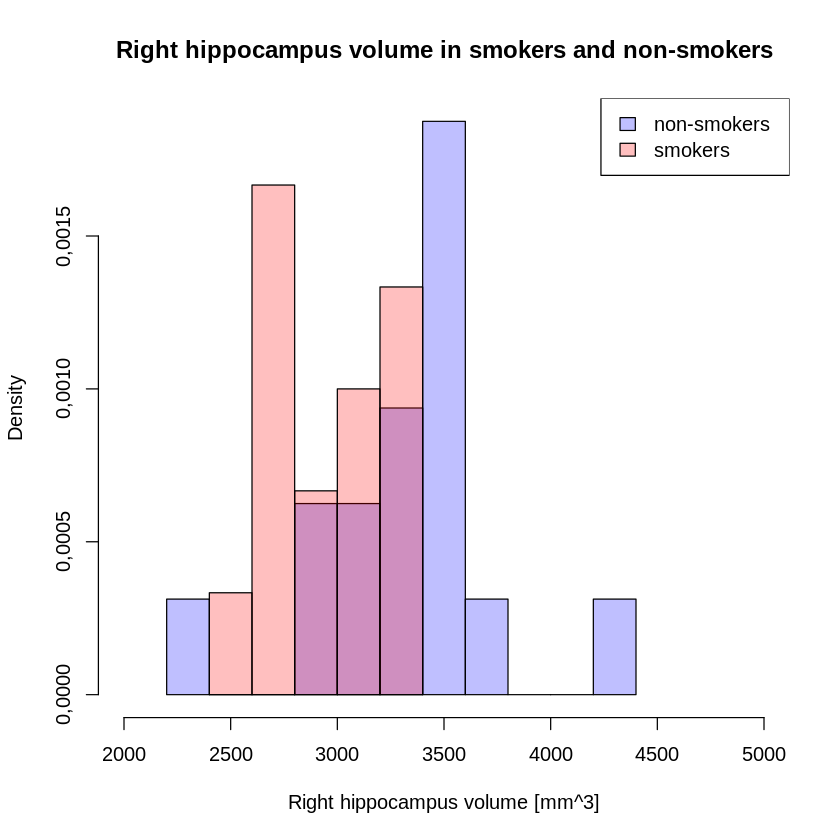

In [73]:
hist(no.smoking$der, col=rgb(0,0,1,1/4), xlim = c(2000,5000), breaks = 10, freq = F,
    xlab = "Right hippocampus volume [mm^3]",
    main = "Right hippocampus volume in smokers and non-smokers")

hist(smoking$der,    col=rgb(1,0,0,1/4), xlim = c(2000,5000), freq = F, add = T)

legend("topright", legend=c("non-smokers", "smokers"),
       col=c(rgb(0,0,1,1/4), rgb(1,0,0,1/4)), fill = c(rgb(0,0,1,1/4), rgb(1,0,0,1/4)), cex=1.0)

Let's now test whether the size of the hippocampus is influenced by the smoking cannabis.

To do this, we can compare the left and right hippocampus volumes in the smokers and non-smokers samples.

Also in this case, we have to define the hipoteses and the choose a value for $\alpha$:
- H$_0$: the hippocampus volume is the same in smokers and non-smokers;
- H$_1$: smoking cannabis for a long time can affect the hippocampus volume;
- $\alpha$ = 0.05

Let's start with the left hippocampus:

In [74]:
t.test(no.smoking$izq, smoking$izq, alternative="two.sided")


	Welch Two Sample t-test

data:  no.smoking$izq and smoking$izq
t = 2,3965, df = 26,452, p-value = 0,0239
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  46,08929 598,49405
sample estimates:
mean of x mean of y 
 3205,625  2883,333 


And then the right one:

In [75]:
t.test(no.smoking$der, smoking$der, alternative="two.sided")


	Welch Two Sample t-test

data:  no.smoking$der and smoking$der
t = 2,9985, df = 25,441, p-value = 0,00599
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 118,2997 635,7837
sample estimates:
mean of x mean of y 
 3334,375  2957,333 


In both cases, the test shows a p-value lower than the $\alpha$ we chose (0.05), when comparing the hippocampus volume in smokers and non-smokers.

The smokers also present a hippocampus volume smaller than the non-smokers.

We can thus conclude that an intense and proglonged use of cannabis can affect the volume of the hippocampus, making it smaller with respect to non-smoking people.